# Train Stock Prive Prediction Model

This model predic the open price of the next day of the specific stock.

## Import Packages

In [11]:
import os
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Constants & Settings

In [2]:
DATA_SOURCE_FOLDER = "/workspaces/valuation/data/staging/stock_price_labeled"
BEST_MODEL_DESTINATION = "/workspaces/valuation/models"
LOOK_FORWARD_DAYS = 180

# Create folders
os.makedirs(BEST_MODEL_DESTINATION, exist_ok=True)

## Read Preprocessed Data

In [3]:
train = pd.read_csv(os.path.join(DATA_SOURCE_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_SOURCE_FOLDER, 'test.csv'))

## Transform Data

In [4]:
train["ds"] = pd.to_datetime(train["ds"])
test["ds"] = pd.to_datetime(test["ds"])

train.drop(columns=["Open", "Adj Close", "Ticker", "Volume", "High", "Low", "Close"], inplace=True)
test.drop(columns=["Open", "Adj Close", "Ticker", "Volume", "High", "Low", "Close"], inplace=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

## Model Training

In [5]:
model = Prophet()
#model.add_regressor('High', standardize=False)
#model.add_regressor('Low', standardize=False)
#model.add_regressor('Close', standardize=False)
model.fit(train)

20:15:04 - cmdstanpy - INFO - Chain [1] start processing
20:15:04 - cmdstanpy - INFO - Chain [1] done processing


## Predict

In [6]:
#forecast = model.predict(X_test)
future = model.make_future_dataframe(periods=LOOK_FORWARD_DAYS)
forecast = model.predict(future)

## Plot

In [7]:
final_df = test.merge(forecast, how='inner', on='ds')

/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


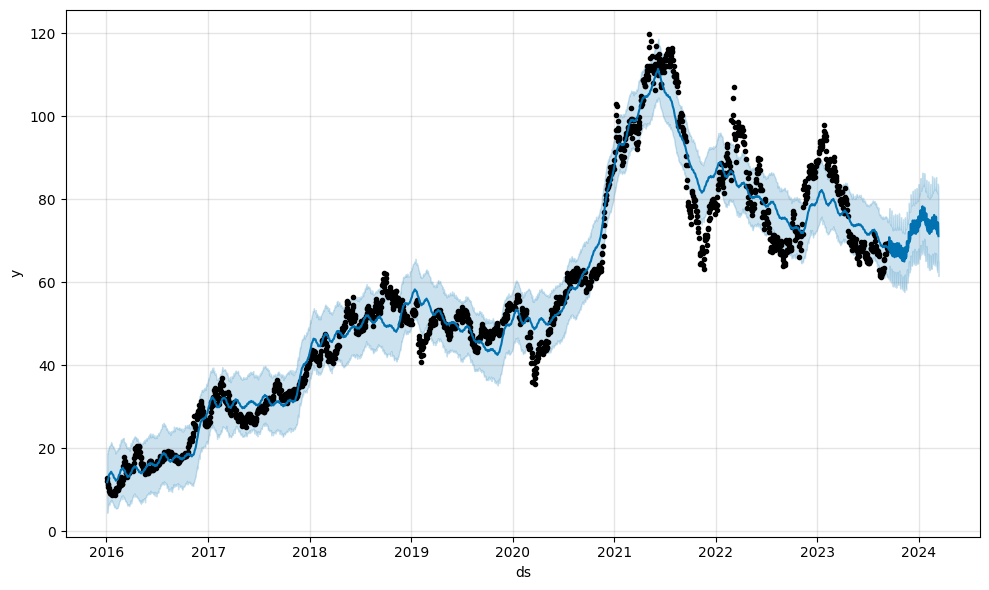

In [9]:
fig1 = model.plot(forecast)

/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old 

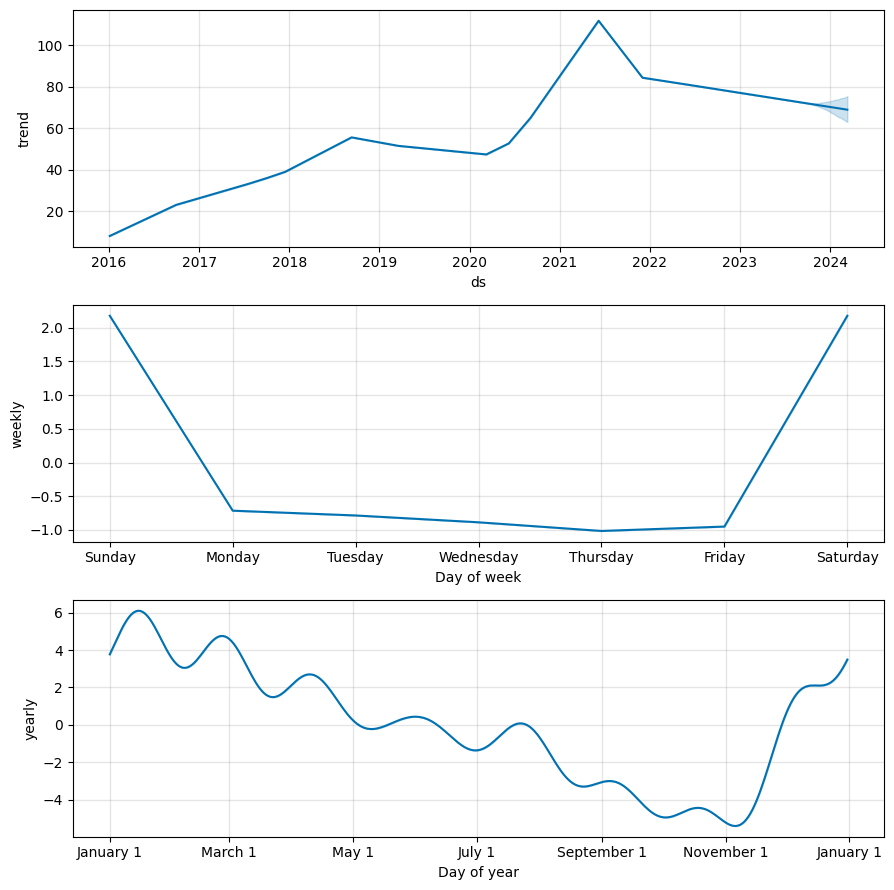

In [15]:
fig2 = model.plot_components(forecast)

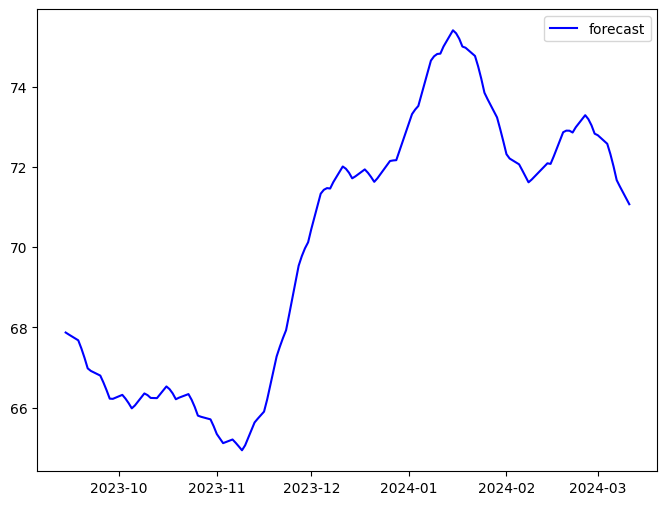

In [20]:
plt.figure(figsize=(8,6))
plt.plot(final_df['ds'],final_df['yhat'],color='blue',label='forecast')
plt.legend()

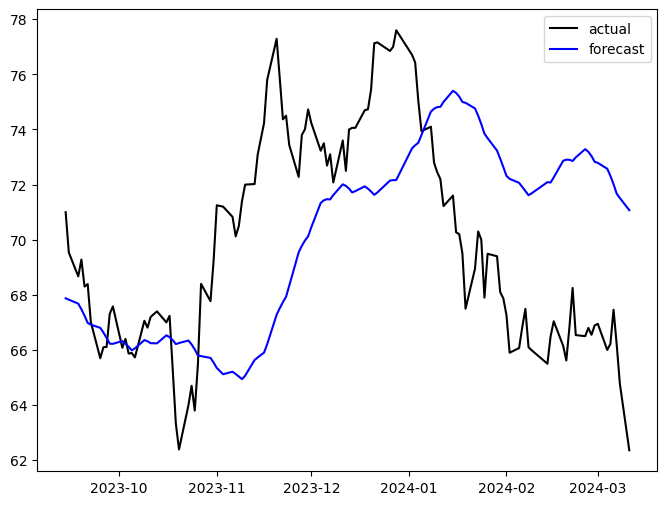

In [21]:
plt.figure(figsize=(8,6))
plt.plot(final_df['ds'],final_df['y'],color='black',label='actual')
plt.plot(final_df['ds'],final_df['yhat'],color='blue',label='forecast')
plt.legend()

## Calculate the Mean Squared Error

In [22]:
mean_squared_error(final_df["yhat"], final_df["y"])

20.792553384091754